<a href="https://colab.research.google.com/github/aditi10998/EDAProject/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

For Exploring and analyze the data to discover key factors responsible for app engagement and success we need to perform lots of steps which are as follows:


1.   loading the data such as given csv files into the Dataframe.
2.   cleaning the data
3.   performing necessary analysis,statistics and visualizations.
4.   keep track of what questions can be asked from the dataset.
5.   conclusion.





Lets Begin with importing all the necessary libraries to our dataset.
we can import some libraries and will modify with additional ones as we go further!!!!

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns


Now we need to connect our dataset to the google drive so that we could access the other files related to our dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


There are two csv files that should be imported in our dataset PlayStoreData and UserReviews.

In [4]:
PlayStoreData_df=pd.read_csv("/content/drive/MyDrive/EDAproject/PlayStoreData.csv")
UserReviews_df=pd.read_csv("/content/drive/MyDrive/EDAproject/UserReviews.csv")

Before proceeding further lets view our data and display all 

In [5]:
PlayStoreData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
UserReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


As we can see from the above table that along with enteries,rows,columns.We can also see datatypes and indexes of dataframes too.

Lets perform the more operations to explore our dataset

In [7]:
PlayStoreData_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
UserReviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


From head function we got know about the first five enteries for the dataset.Let's perform the tail() so that we can see what are last enteries for the dataset

In [23]:
PlayStoreData_df.tail()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [24]:
UserReviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


For now we have explored the dataset more than enough.We can explore it more as needed.
After performing the above operations.Lets begin with cleaning part for the datasets.

For cleaning a dataset we have to check what are the nan values/missing values/null values.Other than this we can also check if there are symbols and handle these things by using some functions.

In [33]:
PlayStoreData_df.loc[:,['Reviews']]

,Reviews
0,159
1,967
2,87510
3,215644
4,967
...,...
10834,7
10836,38
10837,4
10839,114


In [35]:
PlayStoreData_df['Reviews']=PlayStoreData_df['Reviews'].apply(lambda x: int(x))

ValueError: ignored

In [26]:
PlayStoreData_df.groupby('Installs').agg({"App":"count"}).reset_index()['Installs']

0              1
1             10
2            100
3           1000
4          10000
5         100000
6        1000000
7       10000000
8      100000000
9     1000000000
10             5
11            50
12           500
13          5000
14         50000
15        500000
16       5000000
17      50000000
18     500000000
19          Free
Name: Installs, dtype: object

In [46]:
PlayStoreData_df['Installs']=PlayStoreData_df['Installs'].apply(lambda x:x.replace('+','')if '+' in str(x) else x)
PlayStoreData_df['Installs']=PlayStoreData_df['Installs'].apply(lambda x:x.replace(',','')if ',' in str(x) else x)

From the above set of code we performed operations to remove symbols such as +,(,) from installs for the efficiency of dataset.
As you can see below Installs column dont have these symbols now and is ready to perform further analysis.

In [36]:
PlayStoreData_df[PlayStoreData_df['Price']!='0']['Price']

234       $4.99
235       $4.99
290       $4.99
291       $4.99
427       $3.99
          ...  
10690     $0.99
10697     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
Name: Price, Length: 648, dtype: object

In [9]:
PlayStoreData_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


As per cleaning data from our datasets we need to find duplicates and eliminate them.From previous obsevations,We can see installs have duplicate values lets perform analysis and confirm how many duplicate values are present.

In [10]:
apps_duplicate = len(PlayStoreData_df)-len(pd.unique(PlayStoreData_df['App']))
print(f'Number of duplicate value present in the app column is {apps_duplicate}')

Number of duplicate value present in the app column is 1181


From the output we can see there are 1181 duplicates.Let's delete them using drop.The output will show 0 if we executed the command more than once.

In [11]:
app_df = PlayStoreData_df.drop_duplicates(subset=['App'])

In [12]:
PlayStoreData_df_na = PlayStoreData_df.isnull().sum()/len(app_df)*100
PlayStoreData_na = PlayStoreData_df_na.drop(PlayStoreData_df_na[PlayStoreData_df_na == 0].index,axis=0).reset_index()
PlayStoreData_df_na.columns = [' Name','Missing values ratio']
PlayStoreData_df_na

App                0.000000
Category           0.000000
Rating            15.258799
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.010352
Price              0.000000
Content Rating     0.010352
Genres             0.000000
Last Updated       0.000000
Current Ver        0.082816
Android Ver        0.031056
dtype: float64

Rating is the column having the missing values lets drop null values from the rating column.


In [13]:
PlayStoreData_df.dropna(subset=['Rating'],inplace=True)

In [14]:
PlayStoreData_df_na = PlayStoreData_df.isnull().sum()/len(app_df)*100
PlayStoreData_na = PlayStoreData_df_na.drop(PlayStoreData_df_na[PlayStoreData_df_na == 0].index,axis=0).reset_index()
PlayStoreData_df_na.columns = [' Name','Missing values ratio']
PlayStoreData_df_na

App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.010352
Genres            0.000000
Last Updated      0.000000
Current Ver       0.041408
Android Ver       0.031056
dtype: float64

Here we came across more current ver,Android ver and content rating.But these columns are almost those which we not going to work on,we will manage them using mode.

In [49]:
PlayStoreData_df['Current Ver'] = PlayStoreData_df['Current Ver'].fillna(PlayStoreData_df['Current Ver'].mode()[0])
PlayStoreData_df['Android Ver'] = PlayStoreData_df['Android Ver'].fillna(PlayStoreData_df['Android Ver'].mode()[0])
PlayStoreData_df['Content Rating'] = PlayStoreData_df['Content Rating'].fillna(PlayStoreData_df['Content Rating'].mode()[0])

so now we have done with most of our cleaning part!!!YAY!

In [38]:
highest_rated_PlayStoreData_df=PlayStoreData_df[PlayStoreData_df['Rating']>4.6]

Let's see the ratio of number of paid apps and free apps.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

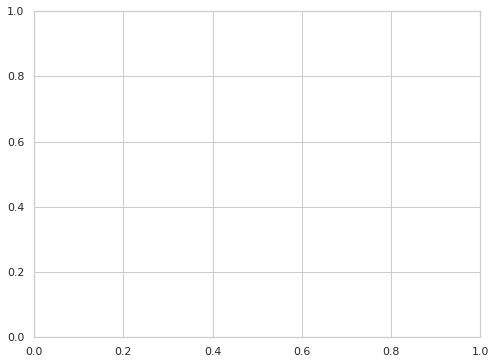

In [47]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(8,6)},palette='pastel')
sns.distplot(a=highest_rated_PlayStoreData_df['Size'],bins=100,color='#F37320')
plt.grid(False)

In [48]:
PlayStoreData_df['Size'] = PlayStoreData_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
PlayStoreData_df['Size'] = PlayStoreData_df['Size'].apply(lambda x: str(x).replace(',','') if 'M' in str(x) else x)
PlayStoreData_df['Size'] = PlayStoreData_df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
PlayStoreData_df['Size'] = PlayStoreData_df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
PlayStoreData_df['Size'] = PlayStoreData_df['Size'].apply(lambda x: float(x))


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

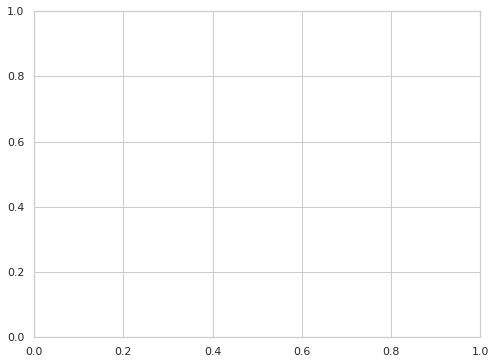

In [43]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(8,6)},palette='pastel')
sns.distplot(a=highest_rated_PlayStoreData_df['Size'],bins=100,color='#F37320')
plt.grid(False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

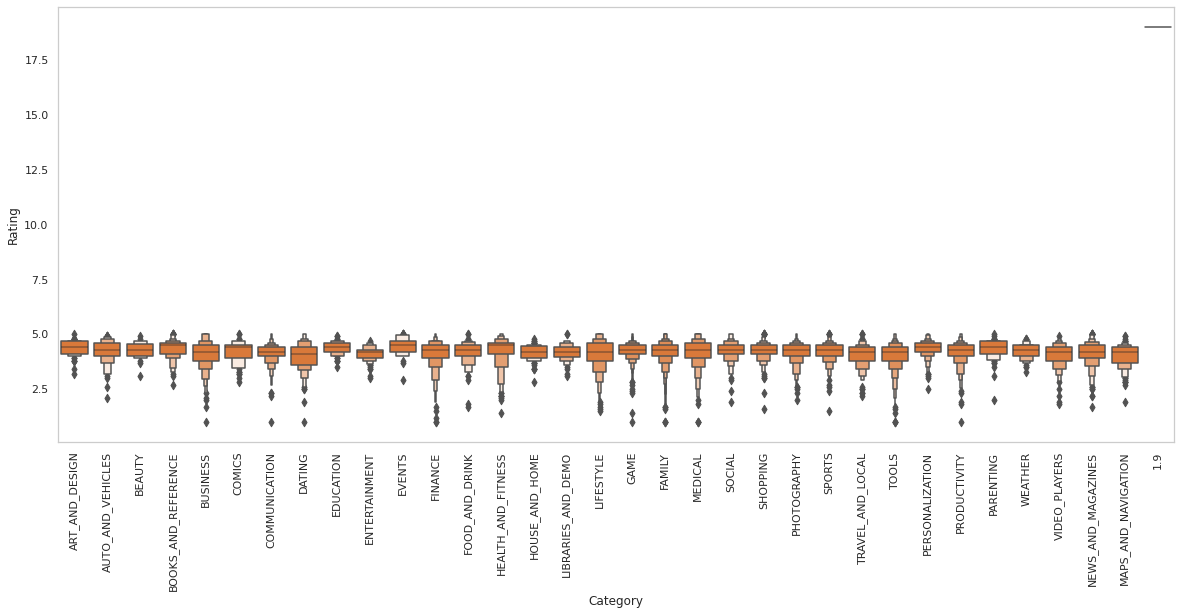

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20,8)})
sns.boxenplot(x=app_df['Category'],y=PlayStoreData_df['Rating'],color='#F37320')
plt.grid(False)
plt.xticks(rotation=90)